In [1]:
using BenchmarkTools
using Plotly
using Random
using StatsBase

using Plot
using Information

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5732443386074705844\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4603832246369656947\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5732443386074705844\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
Random.seed!(20121020)

;

In [3]:
use_style!()

;

In [4]:
function cumulate_sum_reverse(v::Vector)

    return reverse(cumsum(Iterators.reverse(v)))

end

;

In [5]:
element_ = string.(Array('A':'Z'))

n_element = length(element_)

element_score_ = randn(n_element)

;

In [6]:
set_element_ = sample(element_, 3; replace = false)

set_element_ = string.(collect("VXZ"))

;

In [7]:
layout =
    Layout(xaxis_title = "Element", xaxis_tickvals = 1:n_element, xaxis_ticktext = element_)

;

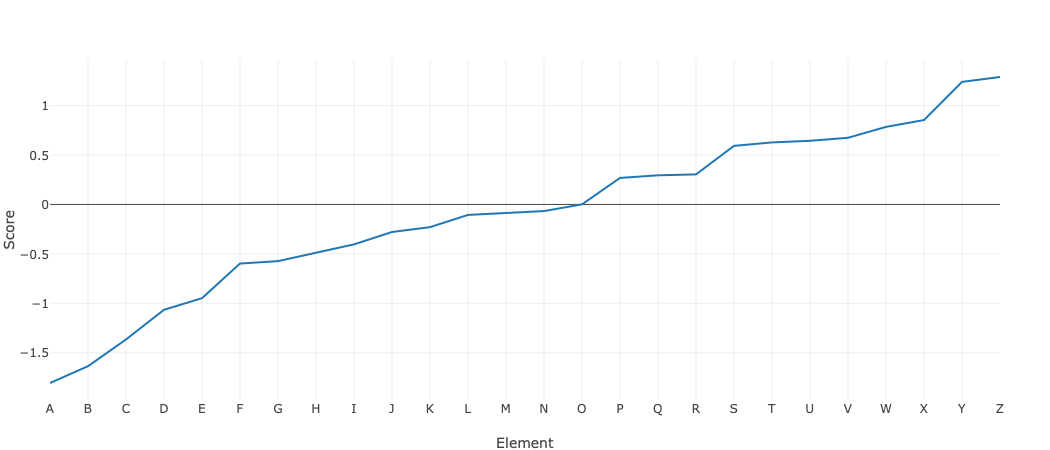

In [8]:
sort_index_ = sortperm(element_score_)

element_score_ = element_score_[sort_index_]

# element_ = element_[sort_index_]

plot_x_y((element_score_,); layout = extend_layout(layout; yaxis_title = "Score"))

## Is

In [9]:
set_element_to_nothing = Dict(set_element => nothing for set_element in set_element_)

Dict{String,Nothing} with 3 entries:
  "Z" => nothing
  "X" => nothing
  "V" => nothing

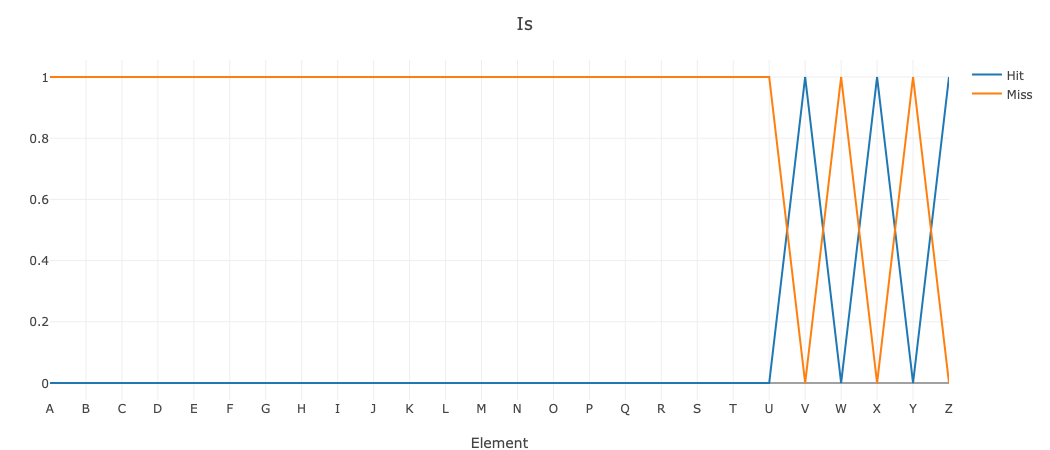

In [10]:
is_h = [haskey(set_element_to_nothing, element) for element in element_]

is_h = convert(Vector{Float64}, is_h)

is_m = 1 .- is_h

plot_x_y(
    (is_h, is_m);
    name_ = ("Hit", "Miss"),
    layout = extend_layout(layout; title = "Is"),
)

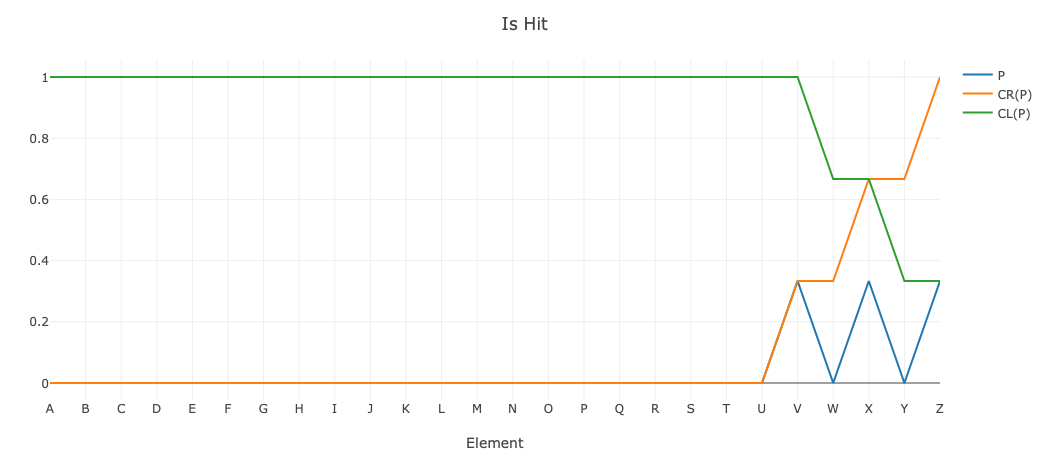

In [11]:
is_h_p = is_h / sum(is_h)

is_h_p_cr = cumsum(is_h_p)

is_h_p_cl = cumulate_sum_reverse(is_h_p)

plot_x_y(
    (is_h_p, is_h_p_cr, is_h_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Is Hit"),
)

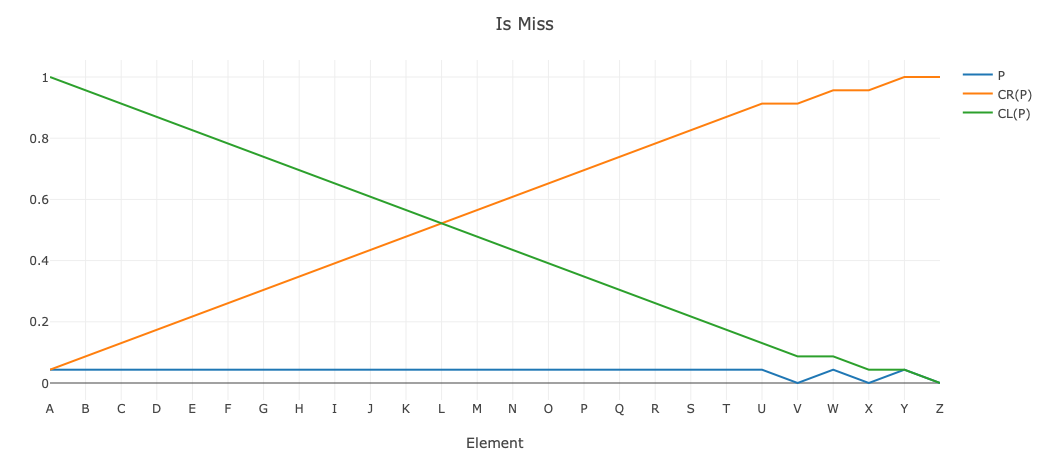

In [12]:
is_m_p = is_m / sum(is_m)

is_m_p_cr = cumsum(is_m_p)

is_m_p_cl = cumulate_sum_reverse(is_m_p)

plot_x_y(
    (is_m_p, is_m_p_cr, is_m_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Is Miss"),
)

## Amplitutde

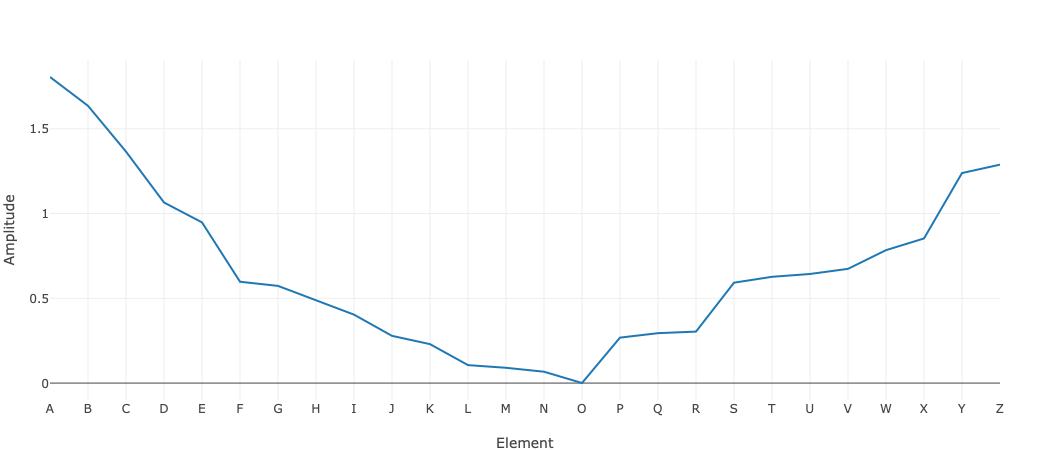

In [13]:
a = abs.(element_score_)

plot_x_y((a,); layout = extend_layout(layout; yaxis_title = "Amplitude"))

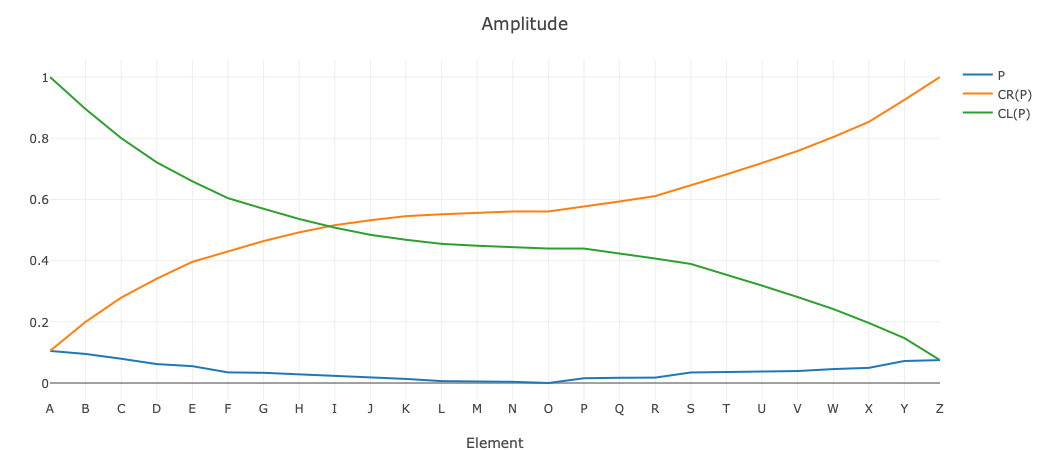

In [14]:
a_p = a / sum(a)

a_p_cr = cumsum(a_p)

a_p_cl = cumulate_sum_reverse(a_p)

plot_x_y(
    (a_p, a_p_cr, a_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude"),
)

In [15]:
small_number = 1e-6 

1.0e-6

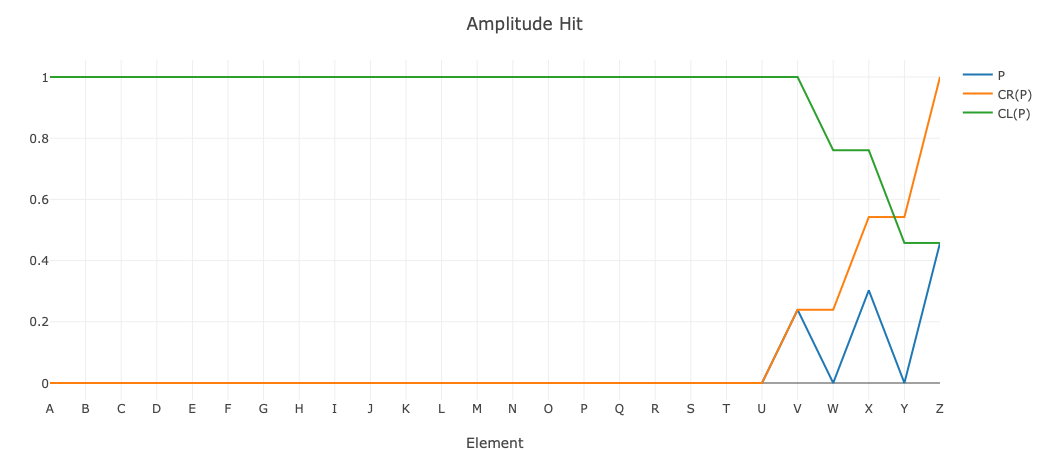

In [16]:
a_h = is_h .* a

a_h_p = a_h / sum(a_h)

a_h_p_cr = cumsum(a_h_p) .+ small_number

a_h_p_cl = cumulate_sum_reverse(a_h_p) .+ small_number

plot_x_y(
    (a_h_p, a_h_p_cr, a_h_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude Hit"),
)

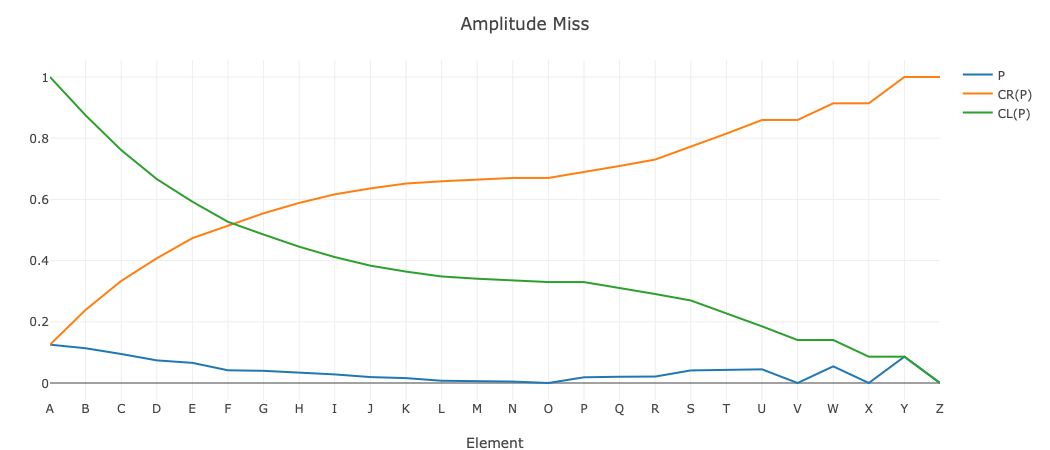

In [17]:
a_m = is_m .* a

a_m_p = a_m / sum(a_m)

a_m_p_cr = cumsum(a_m_p) .+ small_number

a_m_p_cl = cumulate_sum_reverse(a_m_p) .+ small_number

plot_x_y(
    (a_m_p, a_m_p_cr, a_m_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude Miss"),
)

## KS

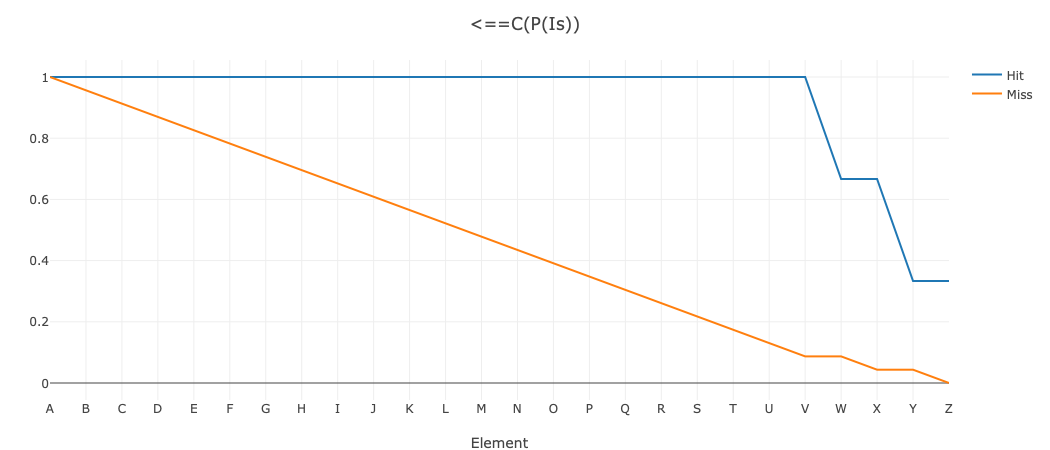

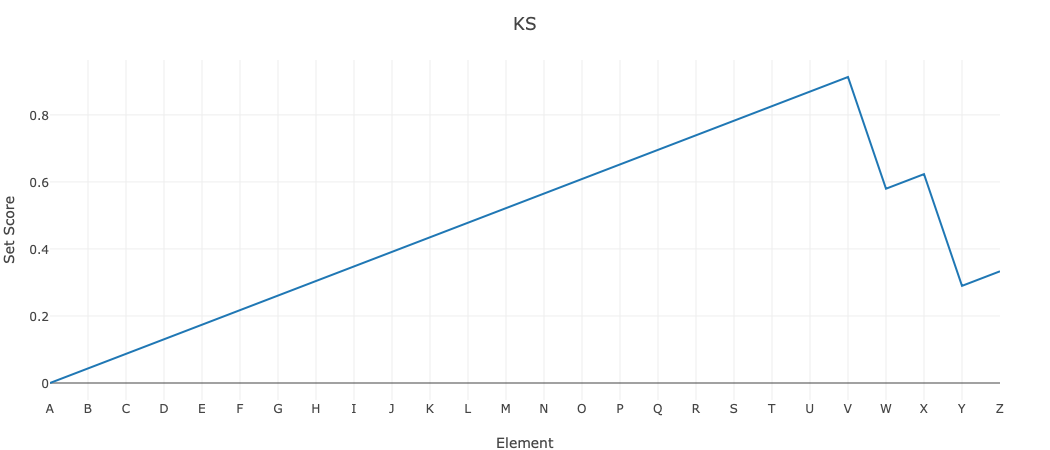

In [18]:
plot_x_y(
    (is_h_p_cl, is_m_p_cl);
    name_ = ("Hit", "Miss"),
    layout = extend_layout(layout; title = "<==C(P(Is))"),
)

ks = is_h_p_cl - is_m_p_cl

plot_x_y((ks,); layout = extend_layout(layout; title = "KS", yaxis_title = "Set Score"))

## JSD

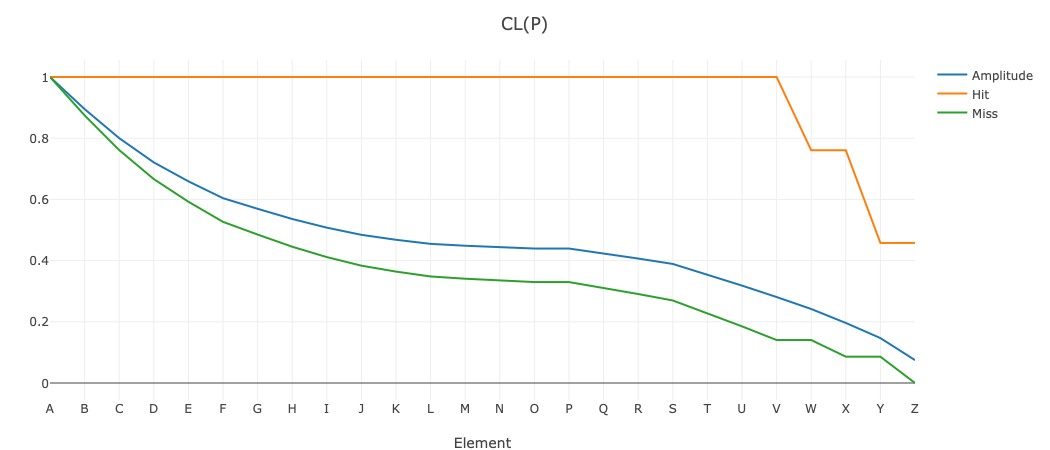

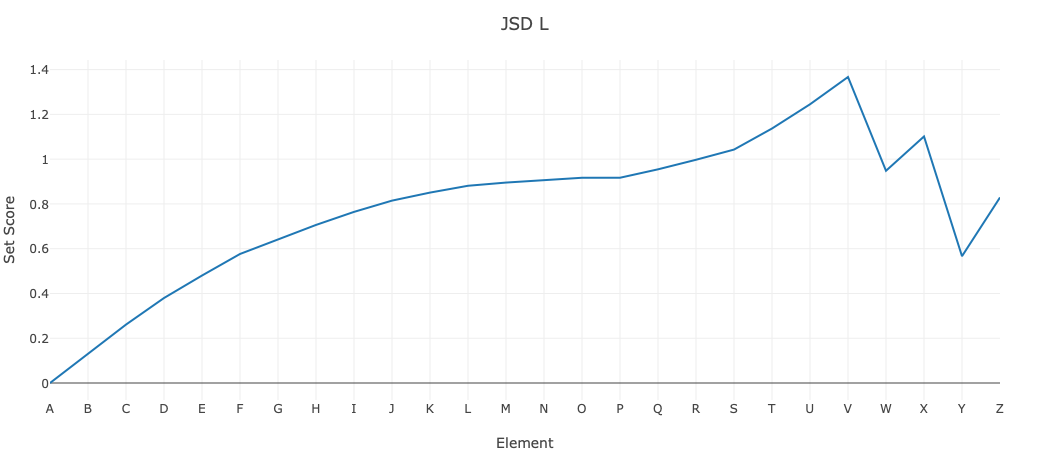

In [19]:
plot_x_y(
    (a_p_cl, a_h_p_cl, a_m_p_cl);
    name_ = ("Amplitude", "Hit", "Miss"),
    layout = extend_layout(layout; title = "CL(P)"),
)

jsd_l = compute_jsd(a_h_p_cl, a_m_p_cl, a_p_cl)

plot_x_y((jsd_l,); layout = extend_layout(layout; title = "JSD L", yaxis_title = "Set Score"))

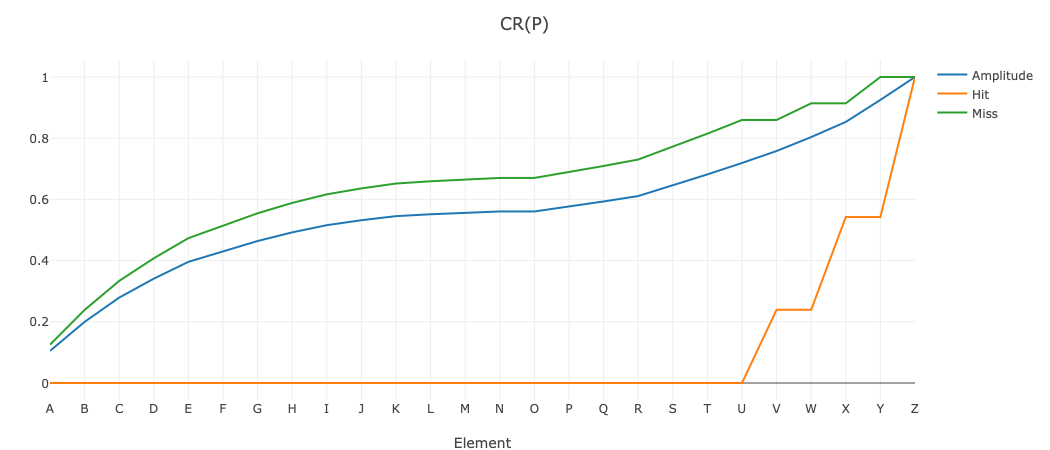

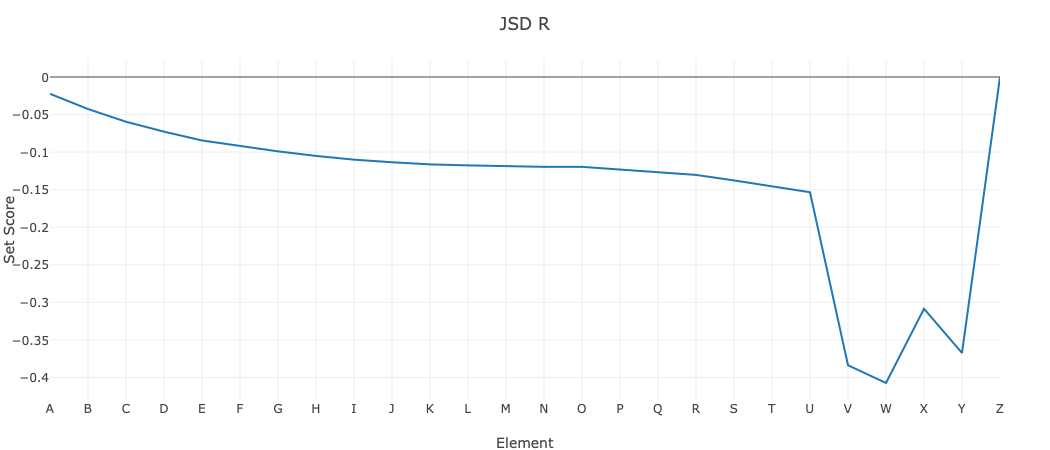

In [20]:
plot_x_y(
    (a_p_cr, a_h_p_cr, a_m_p_cr);
    name_ = ("Amplitude", "Hit", "Miss"),
    layout = extend_layout(layout; title = "CR(P)"),
)

jsd_r = compute_jsd(a_h_p_cr, a_m_p_cr, a_p_cr)

plot_x_y((jsd_r,); layout = extend_layout(layout; title = "JSD R", yaxis_title = "Set Score"))

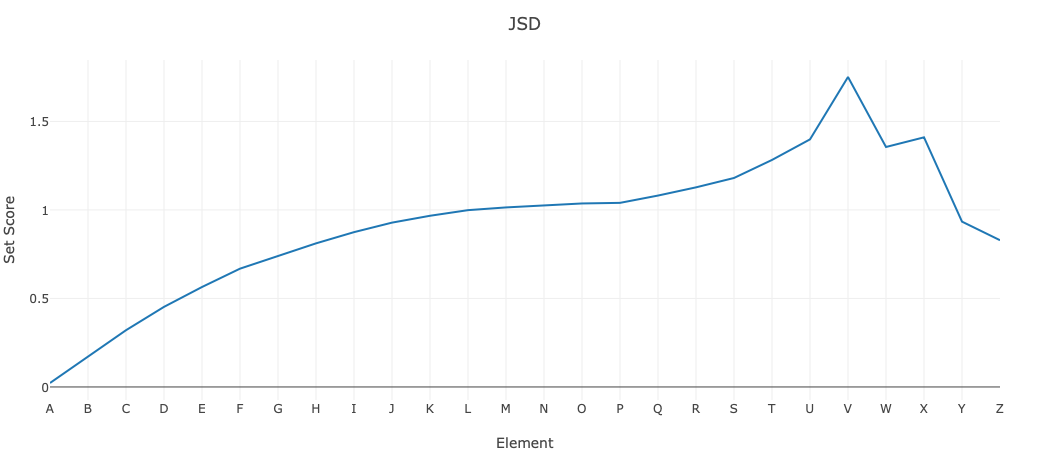

In [21]:
jsd = jsd_l - jsd_r

plot_x_y((jsd,); layout = extend_layout(layout; title = "JSD", yaxis_title = "Set Score"))

## Score

In [22]:
s = ks

26-element Array{Float64,1}:
 4.440892098500626e-16
 0.04347826086956563
 0.08695652173913082
 0.130434782608696
 0.1739130434782612
 0.2173913043478264
 0.2608695652173916
 0.30434782608695676
 0.34782608695652195
 0.39130434782608714
 0.43478260869565233
 0.4782608695652175
 0.5217391304347827
 0.5652173913043479
 0.6086956521739131
 0.6521739130434783
 0.6956521739130435
 0.7391304347826086
 0.782608695652174
 0.8260869565217391
 0.8695652173913043
 0.9130434782608696
 0.5797101449275361
 0.6231884057971014
 0.28985507246376807
 0.3333333333333333

In [23]:
score = sum(s) / length(s)

0.4565217391304349